In [43]:
# Import necessary libraries
import numpy as np
import xarray as xr
import pandas as pd
import matplotlib.pyplot as plt
import os
from matplotlib.colors import ListedColormap

In [125]:
test = xr.open_mfdataset('/rc_scratch/reba1583/variable_yr_files_4/IWV*', chunks = 100, parallel = True)
test

<xarray.Dataset>
Dimensions:    (time: 58440, lat_index: 32, lon: 256)
Coordinates:
  * time       (time) datetime64[ns] 1980-01-01 ... 2019-12-31T18:00:00
  * lon        (lon) float64 -180.0 -178.6 -177.2 -175.8 ... 177.2 178.6 180.0
    lat        (lat_index) float64 dask.array<chunksize=(32,), meta=np.ndarray>
  * lat_index  (lat_index) int64 0 1 2 3 4 5 6 7 8 ... 24 25 26 27 28 29 30 31
Data variables:
    IWV        (time, lat_index, lon) float32 dask.array<chunksize=(100, 32, 100), meta=np.ndarray>

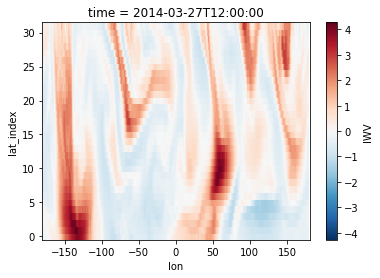

In [126]:
test.isel(time = 50018).IWV.plot()

In [88]:
test = xr.open_mfdataset("/pl/active/ATOC_SynopticMet/data/ar_data/Research3/Data/Y/1980*")
test

<xarray.Dataset>
Dimensions:  (time: 1464, lat_index: 32, lon: 256)
Coordinates:
  * time     (time) datetime64[ns] 1980-01-01 ... 1980-12-31T18:00:00
    lat      (lat_index) float64 dask.array<chunksize=(32,), meta=np.ndarray>
  * lon      (lon) float64 -180.0 -178.6 -177.2 -175.8 ... 177.2 178.6 180.0
Dimensions without coordinates: lat_index
Data variables:
    Y        (time, lat_index, lon) float64 dask.array<chunksize=(1464, 32, 256), meta=np.ndarray>

In [89]:
np.unique(test.isel(time = slice(0,100)).Y)

array([0.000e+00, 1.000e+00, 1.000e+01, 1.100e+01, 1.000e+02, 1.010e+02,
       1.100e+02, 1.110e+02, 1.000e+03, 1.001e+03, 1.010e+03, 1.011e+03,
       1.100e+03, 1.101e+03, 1.110e+03, 1.111e+03])

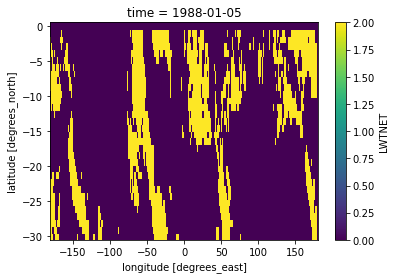

In [50]:
test2 = xr.where(test == 3,2,0)
test2.isel(time = 16).LWTNET.plot()

## checkout LWTNET - wehre 220 sits in the distribution

In [2]:
data = xr.open_mfdataset('/pl/active/ATOC_SynopticMet/data/ar_data/Research2/3hrly_merra2_hemisphere/LWTNET/LWTNET_1980*')

In [4]:
data.sel(lat = slice(-30,0))

<xarray.Dataset>
Dimensions:  (time: 2928, lon: 576, lat: 61)
Coordinates:
  * time     (time) datetime64[ns] 1980-01-01 ... 1980-12-31T21:00:00
  * lon      (lon) float64 -180.0 -179.4 -178.8 -178.1 ... 178.1 178.8 179.4
  * lat      (lat) float64 -30.0 -29.5 -29.0 -28.5 ... -1.5 -1.0 -0.5 -1.798e-13
Data variables:
    LWTNET   (time, lat, lon) float32 dask.array<chunksize=(8, 61, 576), meta=np.ndarray>

In [8]:
def make_yr_data(file_path):
    data = xr.open_mfdataset(file_path)
    data = data.resample(time = '6H').mean()
    data = data.interp(lon = np.linspace(-180,180,256), lat = np.linspace(-30, 0, 32))
    data = data.load()
    return(data)
    
    

In [9]:
d1980 = make_yr_data('/pl/active/ATOC_SynopticMet/data/ar_data/Research2/3hrly_merra2_hemisphere/LWTNET/LWTNET_1980*')


In [10]:
d1990 = make_yr_data('/pl/active/ATOC_SynopticMet/data/ar_data/Research2/3hrly_merra2_hemisphere/LWTNET/LWTNET_1990*')
d2000 = make_yr_data('/pl/active/ATOC_SynopticMet/data/ar_data/Research2/3hrly_merra2_hemisphere/LWTNET/LWTNET_2000*')
d2010 = make_yr_data('/pl/active/ATOC_SynopticMet/data/ar_data/Research2/3hrly_merra2_hemisphere/LWTNET/LWTNET_2010*')



In [11]:
data = xr.concat([d1980, d1990, d2000, d2010], dim = 'time')


In [12]:
data

<xarray.Dataset>
Dimensions:  (time: 5848, lat: 32, lon: 256)
Coordinates:
  * time     (time) datetime64[ns] 1980-01-01 ... 2010-12-31T18:00:00
  * lon      (lon) float64 -180.0 -178.6 -177.2 -175.8 ... 177.2 178.6 180.0
  * lat      (lat) float64 -30.0 -29.03 -28.06 -27.1 ... -1.935 -0.9677 0.0
Data variables:
    LWTNET   (time, lat, lon) float64 164.9 158.7 163.2 163.1 ... nan nan nan

In [26]:
std = data.groupby('time.month').std('time')

/home/reba1583/.local/lib/python3.7/site-packages/numpy/lib/nanfunctions.py:1671: RuntimeWarning: Degrees of freedom <= 0 for slice.
  keepdims=keepdims)
/home/reba1583/.local/lib/python3.7/site-packages/numpy/lib/nanfunctions.py:1671: RuntimeWarning: Degrees of freedom <= 0 for slice.
  keepdims=keepdims)
/home/reba1583/.local/lib/python3.7/site-packages/numpy/lib/nanfunctions.py:1671: RuntimeWarning: Degrees of freedom <= 0 for slice.
  keepdims=keepdims)
/home/reba1583/.local/lib/python3.7/site-packages/numpy/lib/nanfunctions.py:1671: RuntimeWarning: Degrees of freedom <= 0 for slice.
  keepdims=keepdims)
/home/reba1583/.local/lib/python3.7/site-packages/numpy/lib/nanfunctions.py:1671: RuntimeWarning: Degrees of freedom <= 0 for slice.
  keepdims=keepdims)
/home/reba1583/.local/lib/python3.7/site-packages/numpy/lib/nanfunctions.py:1671: RuntimeWarning: Degrees of freedom <= 0 for slice.
  keepdims=keepdims)
/home/reba1583/.local/lib/python3.7/site-packages/numpy/lib/nanfunctions.py:

In [27]:
mean = data.groupby('time.month').mean('time')

In [28]:
test = (220 - mean)/std
test

<xarray.Dataset>
Dimensions:  (lon: 256, lat: 32, month: 12)
Coordinates:
  * lon      (lon) float64 -180.0 -178.6 -177.2 -175.8 ... 177.2 178.6 180.0
  * lat      (lat) float64 -30.0 -29.03 -28.06 -27.1 ... -1.935 -0.9677 0.0
  * month    (month) int64 1 2 3 4 5 6 7 8 9 10 11 12
Data variables:
    LWTNET   (month, lat, lon) float64 -0.7368 -0.7535 -0.7694 ... nan nan nan

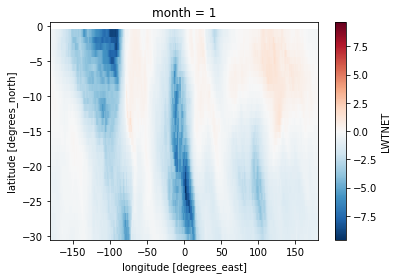

In [29]:
test.isel(month = 0).LWTNET.plot()

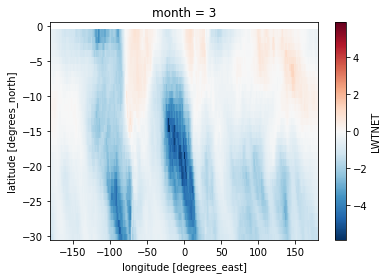

In [30]:
test.isel(month = 2).LWTNET.plot()

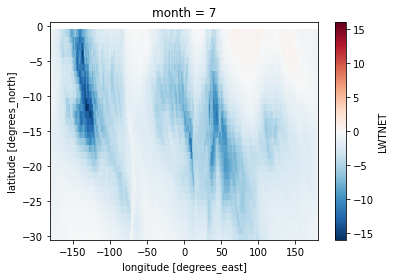

In [31]:
test.isel(month = 6).LWTNET.plot()

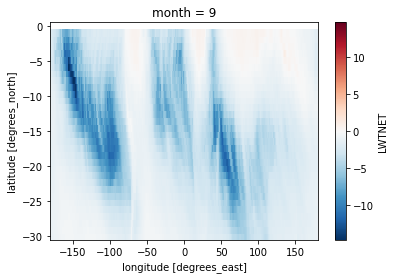

In [32]:
test.isel(month = 8).LWTNET.plot()

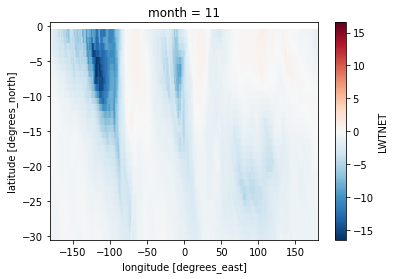

In [33]:
test.isel(month = 10).LWTNET.plot()

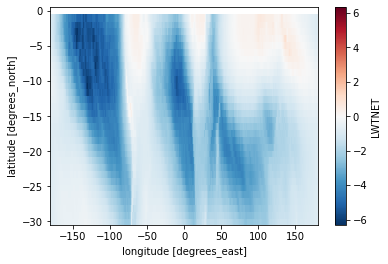

In [36]:
test.mean(dim = 'month').LWTNET.plot()

(array([  5.,  13.,  39.,  76., 127., 126., 109., 124., 225., 219., 207.,
        207., 251., 321., 332., 393., 419., 403., 411., 425., 434., 561.,
        691., 614., 383., 303., 328., 134.,  22.,   3.]),
 array([-6.30890908, -6.06437685, -5.81984462, -5.57531239, -5.33078016,
        -5.08624793, -4.8417157 , -4.59718347, -4.35265124, -4.10811901,
        -3.86358679, -3.61905456, -3.37452233, -3.1299901 , -2.88545787,
        -2.64092564, -2.39639341, -2.15186118, -1.90732895, -1.66279672,
        -1.41826449, -1.17373227, -0.92920004, -0.68466781, -0.44013558,
        -0.19560335,  0.04892888,  0.29346111,  0.53799334,  0.78252557,
         1.0270578 ]),
 <BarContainer object of 30 artists>)

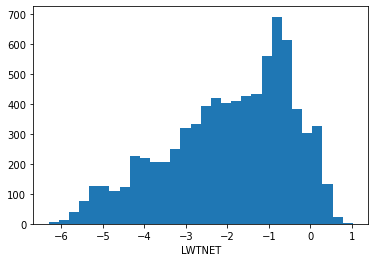

In [38]:
xr.plot.hist(test.mean(dim = 'month').LWTNET, bins = 30)

In [42]:
test.mean(dim = 'month').LWTNET.median()

<xarray.DataArray 'LWTNET' ()>
array(-1.69164466)

# other testing

In [2]:
variable = 'sf'
# fp_out_3 = '/rc_scratch/reba1583/variable_yr_files_3/'
fp_out_3 = '/pl/active/ATOC_SynopticMet/data/ar_data/Research3/ML_testing/4yr/'

data = xr.open_mfdataset(fp_out_3+variable+'*')


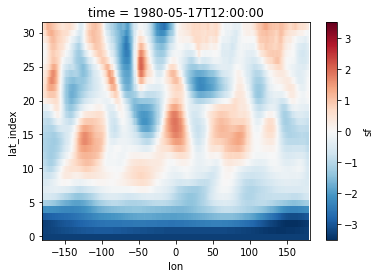

In [4]:
test = xr.open_mfdataset('/pl/active/ATOC_SynopticMet/data/ar_data/Research3/ML_testing/4yr_std_anom/sf')
test.isel(time = 550).sf.plot()


In [43]:
data = data.drop_dims('lev')
data

<xarray.Dataset>
Dimensions:  (time: 5848, lon: 256, lat: 32)
Coordinates:
  * time     (time) datetime64[ns] 1980-01-01 ... 1992-12-31T18:00:00
  * lon      (lon) float64 -180.0 -178.6 -177.2 -175.8 ... 177.2 178.6 180.0
  * lat      (lat) float64 -75.0 -74.03 -73.06 -72.1 ... -46.94 -45.97 -45.0
Data variables:
    *empty*

In [143]:
mean_out

<xarray.Dataset>
Dimensions:    (month: 12, lat_index: 32, lon: 256)
Coordinates:
  * lon        (lon) float64 -180.0 -178.6 -177.2 -175.8 ... 177.2 178.6 180.0
    lat        (lat_index) float64 -70.0 -69.03 -68.06 ... -41.94 -40.97 -40.0
  * lat_index  (lat_index) int64 0 1 2 3 4 5 6 7 8 ... 24 25 26 27 28 29 30 31
  * month      (month) int64 1 2 3 4 5 6 7 8 9 10 11 12
Data variables:
    IWV        (month, lat_index, lon) float32 4.513 4.571 4.624 ... 16.82 nan

In [141]:
data_input.isel(lat_index = 20, lon = 100).IWV.mean()

<xarray.DataArray 'IWV' ()>
array(10.178553, dtype=float32)
Coordinates:
    lon        float64 -38.82
    lat        float64 -50.65
    lat_index  int64 20

In [138]:
data_updated.isel(lat_index = 20, lon = 100).IWV.mean()

<xarray.DataArray 'IWV' ()>
array(10.1785555, dtype=float32)
Coordinates:
    lon        float64 -38.82
    lat        float64 -50.65
    lat_index  int64 20

In [144]:
# for v in range(1,8):
#     variable_index = v

# Functions
variable_index = 7
def make_IWV_climo_stats(data_input):
    """
    input data and create a symmetric distribution based on the right hand side of the distribution. 
    Use this for IWV before calculating the std and mean so that the std is not skewed by the limit
    of the distribution at 0. 
    """
    mean = data_input.mean(dim = 'time')
    data1 = data.where(data>= mean)
    data2 = mean - np.abs(data1 - mean)
    data2['time'] = data2.time +pd.Timedelta('1H')

    data_updated = xr.concat((data1, data2), dim = 'time')

    mean_out = data_updated.groupby("time.month").mean('time')
    std_out = data_updated.groupby("time.month").std('time')
    return(mean_out, std_out)


# fp_out_3 = '/rc_scratch/reba1583/variable_yr_files_3/'
fp_out_3 = '/pl/active/ATOC_SynopticMet/data/ar_data/Research3/ML_testing/4yr/'

variables = [
    'U',
    'V',
    'T',
    'SLP',
    'EFLUX',
    'LWTNET',
    'sf',
    'IWV',
]
variable = variables[variable_index]


data = xr.open_mfdataset(fp_out_3+variable+'*').load()
if 'lev' in data.dims:
    data = data.squeeze()
    data = data.drop('lev')


#add uniform lat_index
lat_index = np.arange(0,32)
data = data.assign_coords(lat_index=("lat", lat_index))
data = data.swap_dims({'lat':'lat_index'})

if variable == 'LWTNET': # LWTNET is binary so it does not need to be normalized
    data.to_netcdf('/rc_scratch/reba1583/variable_yr_files_4/'+variable)
else:
    if variable =='IWV':
        # base standard deviation off of right half of IWV distribution
        climo_mean, climo_std = make_IWV_climo_stats(data) 
    else:
        climo_mean = data.groupby("time.month").mean('time')
        climo_std = data.groupby("time.month").std('time')

    stand_anomalies = xr.apply_ufunc(
        lambda x, m, s: (x - m) / s,
        data.groupby("time.month"),
        climo_mean,
        climo_std,
    )
    stand_anomalies = stand_anomalies.drop('month')


#     stand_anomalies.to_netcdf('/rc_scratch/reba1583/variable_yr_files_4/'+variable+'.nc')
    stand_anomalies.to_netcdf('/pl/active/ATOC_SynopticMet/data/ar_data/Research3/ML_testing/4yr_std_anom/'+variable)
    print(variable)


/home/reba1583/.local/lib/python3.7/site-packages/numpy/lib/nanfunctions.py:1671: RuntimeWarning: Degrees of freedom <= 0 for slice.
  keepdims=keepdims)
/home/reba1583/.local/lib/python3.7/site-packages/numpy/lib/nanfunctions.py:1671: RuntimeWarning: Degrees of freedom <= 0 for slice.
  keepdims=keepdims)
/home/reba1583/.local/lib/python3.7/site-packages/numpy/lib/nanfunctions.py:1671: RuntimeWarning: Degrees of freedom <= 0 for slice.
  keepdims=keepdims)
/home/reba1583/.local/lib/python3.7/site-packages/numpy/lib/nanfunctions.py:1671: RuntimeWarning: Degrees of freedom <= 0 for slice.
  keepdims=keepdims)
/home/reba1583/.local/lib/python3.7/site-packages/numpy/lib/nanfunctions.py:1671: RuntimeWarning: Degrees of freedom <= 0 for slice.
  keepdims=keepdims)
/home/reba1583/.local/lib/python3.7/site-packages/numpy/lib/nanfunctions.py:1671: RuntimeWarning: Degrees of freedom <= 0 for slice.
  keepdims=keepdims)
/home/reba1583/.local/lib/python3.7/site-packages/numpy/lib/nanfunctions.py:

IWV


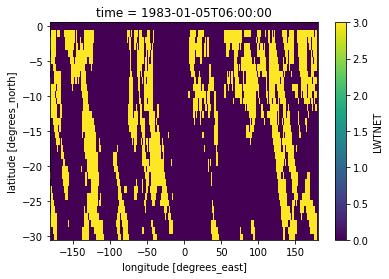

In [55]:
test = xr.open_mfdataset('/rc_scratch/reba1583/variable_yr_files_3/LWTNET_1983.nc')
test.isel(time = 17).LWTNET.plot()


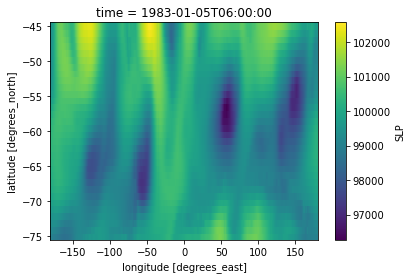

In [67]:
test = xr.open_mfdataset('/rc_scratch/reba1583/variable_yr_files_3/SLP_1983.nc')
test.isel(time = 17).SLP.plot()

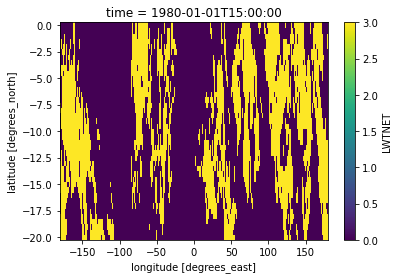

In [41]:
test = test.sel(lat = slice(-20,0)).LWTNET
test = xr.where(test<220,3,0)
test.plot()

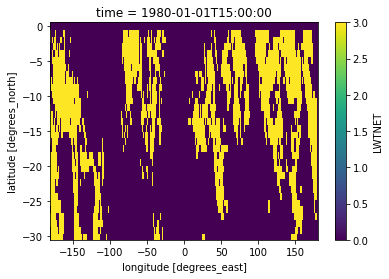

In [40]:
test2 = test.interp(lat = np.linspace(-30,0, 32), lon = np.linspace(-180,180, 256))
test2 = xr.where(test2<220,3,0)
test2.LWTNET.plot()

In [34]:
test2

<xarray.Dataset>
Dimensions:  (lon: 576, lat: 5)
Coordinates:
    time     datetime64[ns] 1980-01-01T15:00:00
  * lon      (lon) float64 -180.0 -179.4 -178.8 -178.1 ... 178.1 178.8 179.4
  * lat      (lat) float64 -20.0 -15.0 -10.0 -5.0 0.0
Data variables:
    LWTNET   (lat, lon) float64 140.7 132.6 130.5 138.0 ... nan nan nan nan

# Step 1: Run Make_X_data/Make_yrly_data

# 3. after running Make_data.py in parallel

In [ ]:
## For all other variables: use Make_data to get data to scratch, then do the following

In [ ]:
# combine years of data
variable = 'LWTNET'
test = xr.open_mfdataset('/rc_scratch/reba1583/variable_yr_files_3/'+str(variable)+'*')
test = test.load()
test.to_netcdf('/pl/active/ATOC_SynopticMet/data/ar_data/Research3/ML_testing/3yr/LWTNET.nc')



# 3. feature data - make standardized anomalies

In [33]:
# repeat for each variable - save standardized anomalies
SLP = xr.open_mfdataset(fp +'SLP.nc')

variable = 'SLP'
data = SLP.load()

climo_mean = data.groupby("time.month").mean('time')
climo_std = data.groupby("time.month").std('time')

stand_anomalies = xr.apply_ufunc(
    lambda x, m, s: (x - m) / s,
    data.groupby("time.month"),
    climo_mean,
    climo_std,
)

stand_anomalies.to_netcdf('/rc_scratch/reba1583/variable_yr_files_4/'+variable)




/home/reba1583/.local/lib/python3.7/site-packages/numpy/lib/nanfunctions.py:1671: RuntimeWarning: Degrees of freedom <= 0 for slice.
  keepdims=keepdims)
/home/reba1583/.local/lib/python3.7/site-packages/numpy/lib/nanfunctions.py:1671: RuntimeWarning: Degrees of freedom <= 0 for slice.
  keepdims=keepdims)
/home/reba1583/.local/lib/python3.7/site-packages/numpy/lib/nanfunctions.py:1671: RuntimeWarning: Degrees of freedom <= 0 for slice.
  keepdims=keepdims)
/home/reba1583/.local/lib/python3.7/site-packages/numpy/lib/nanfunctions.py:1671: RuntimeWarning: Degrees of freedom <= 0 for slice.
  keepdims=keepdims)
/home/reba1583/.local/lib/python3.7/site-packages/numpy/lib/nanfunctions.py:1671: RuntimeWarning: Degrees of freedom <= 0 for slice.
  keepdims=keepdims)
/home/reba1583/.local/lib/python3.7/site-packages/numpy/lib/nanfunctions.py:1671: RuntimeWarning: Degrees of freedom <= 0 for slice.
  keepdims=keepdims)
/home/reba1583/.local/lib/python3.7/site-packages/numpy/lib/nanfunctions.py:

# 4. Compile and format data for training (a, b, c, d)

* not enough memory in notebook - complete step 4 using Make_one_large_dataset.py Make_one_large_dataset.scripte

In [148]:
fp = '/pl/active/ATOC_SynopticMet/data/ar_data/Research3/ML_testing/4yr_std_anom/'

IWV = xr.open_mfdataset(fp+'IWV').IWV.values
EFLUX = xr.open_mfdataset(fp+'EFLUX').EFLUX.values
LWTNET = xr.open_mfdataset(fp+'LWTNET').LWTNET.values
SF = xr.open_mfdataset(fp+'sf').sf.values
SLP = xr.open_mfdataset(fp+'SLP').SLP.values
T = xr.open_mfdataset(fp+'T').T.values
U = xr.open_mfdataset(fp+'U').U.values
V = xr.open_mfdataset(fp+'V').V.values

In [151]:
data = np.stack([ IWV, EFLUX, LWTNET,
                 SF, SLP, T, U, V])



In [153]:
del V 
del U
del T
del IWV
del EFLUX
del SF
del SLP
del LWTNET

In [154]:
np.shape(data)

(8, 5848, 32, 256)

In [156]:
Y = xr.open_mfdataset(['/pl/active/ATOC_SynopticMet/data/ar_data/Research3/Data/Y/1980',
                       '/pl/active/ATOC_SynopticMet/data/ar_data/Research3/Data/Y/1982',
                       '/pl/active/ATOC_SynopticMet/data/ar_data/Research3/Data/Y/1990',
                       '/pl/active/ATOC_SynopticMet/data/ar_data/Research3/Data/Y/1992',
                      ])

In [160]:
Y = Y.Y.values

In [167]:
variable_times = xr.open_mfdataset(fp+'U').time


DatetimeIndex(['1980-01-01 00:00:00', '1980-01-01 06:00:00',
               '1980-01-01 12:00:00', '1980-01-01 18:00:00',
               '1980-01-02 00:00:00', '1980-01-02 06:00:00',
               '1980-01-02 12:00:00', '1980-01-02 18:00:00',
               '1980-01-03 00:00:00', '1980-01-03 06:00:00',
               ...
               '1992-12-29 12:00:00', '1992-12-29 18:00:00',
               '1992-12-30 00:00:00', '1992-12-30 06:00:00',
               '1992-12-30 12:00:00', '1992-12-30 18:00:00',
               '1992-12-31 00:00:00', '1992-12-31 06:00:00',
               '1992-12-31 12:00:00', '1992-12-31 18:00:00'],
              dtype='datetime64[ns]', length=5848, freq=None)

In [188]:
var_data = dict(
    features = (['n_channel', 'time', 'lat', 'lon' ], data),
    labels_2d = (['time', 'lat', 'lon'], Y)
)

coords = dict(
    n_channel = (['n_channel'], np.array(['IWV', 'EFLUX', 'LWTNET', 'SF', 'SLP', 'T', 'U', 'V'])),
    time = (['time'], pd.to_datetime(np.array(variable_times))),
    
)


In [189]:
ds = xr.Dataset(
    data_vars = var_data, 
    coords = coords
)


In [190]:
ds

<xarray.Dataset>
Dimensions:    (n_channel: 8, time: 5848, lat: 32, lon: 256)
Coordinates:
  * n_channel  (n_channel) <U6 'IWV' 'EFLUX' 'LWTNET' 'SF' 'SLP' 'T' 'U' 'V'
  * time       (time) datetime64[ns] 1980-01-01 ... 1992-12-31T18:00:00
Dimensions without coordinates: lat, lon
Data variables:
    features   (n_channel, time, lat, lon) float64 0.4082 0.4454 ... 0.7982 nan
    labels_2d  (time, lat, lon) float64 1e+03 1e+03 1e+03 1e+03 ... 0.0 0.0 0.0

## a. load in data and put together

In [2]:


fp = '/rc_scratch/reba1583/variable_yr_files_4/'

H = xr.open_mfdataset(fp+'H').H.values
IWV = xr.open_mfdataset(fp+'IWV').IWV.values
EFLUX = xr.open_mfdataset(fp+'EFLUX').EFLUX.values
LWTNET = xr.open_mfdataset(fp+'LWTNET').LWTNET.values
SF = xr.open_mfdataset(fp+'SF').sf.values
SLP = xr.open_mfdataset(fp+'SLP').SLP.values
T = xr.open_mfdataset(fp+'T').T.values
U = xr.open_mfdataset(fp+'U').U.values
V = xr.open_mfdataset(fp+'V').V.values

In [1]:
del H
del V 
del U
del T
del IWV
del EFLUX
del SF
del SLP
del LWTNET


NameError: name 'H' is not defined

## b. 1D labeling - Is there an AR making landfall?

In [4]:
# category 1d label data: is there a landfalling AR or no

centers = pd.read_csv('/pl/active/ATOC_SynopticMet/data/ar_data/Research3/ML_testing/ML_test_artimes_centers.csv')
centers = centers[pd.to_datetime(centers.AR_time)<pd.to_datetime('2003-01-01')]

ar_times = pd.to_datetime(np.array(centers.AR_time))

times_resampled = []
for i in range(len(ar_times)):
    if ar_times[i].hour in [0,6,12,18]:
        times_resampled.append(ar_times[i])
    else:
        times_resampled.append(ar_times[i] - pd.Timedelta(hours = 3))

ar_times_6hrly = pd.to_datetime(np.unique(times_resampled))
    
times = pd.DataFrame({'time':pd.to_datetime(np.array(variable_times))}).set_index('time')

times['AR_flag'] = np.zeros(len(times))
times.AR_flag[times.index.isin(ar_times_6hrly)] = 1

ar_flag = np.array(times.AR_flag)


NameError: name 'variable_times' is not defined

## c. 2d labeling, AR masks

In [72]:
#resample ar_catalog in time and space, take maximums
ar_catalog = xr.open_mfdataset(['/projects/reba1583/Research2/data/AR_catalogue/2000.nc', '/projects/reba1583/Research2/data/AR_catalogue/2001.nc', '/projects/reba1583/Research2/data/AR_catalogue/2002.nc']).sel(lat =slice(-90,0))
ar_catalog = ar_catalog.resample(time="6H").max()
ar_catalog = ar_catalog.interp(lon = np.arange(-180,181,1), lat = np.arange(-90,1,1))

ar_values = ar_catalog.ar_binary_tag.values
ar_values[np.isnan(ar_values)] = 0
ar_values[ar_values<=.0001] = 0
ar_values[ar_values>.0001] = 1

In [80]:
#make a netcdf with all the times between 2000 and 2003 with AR binary tags filled in 
ar_catalog_times = ar_catalog.time.values
times = xr.open_mfdataset('/rc_scratch/reba1583/variable_yr_files_4/H').time.values
ar_catalog_data = np.zeros((4384, 91,361))

ar_catalog_data[np.searchsorted(times, ar_catalog_times)] = ar_values

ar_ds = xr.DataArray(ar_catalog_data, coords = [times, ar_catalog.lat, ar_catalog.lon], dims = ['time', 'lat', 'lon', ], name='ar_binary_tag')

ar_ds.to_netcdf('/pl/active/ATOC_SynopticMet/data/ar_data/Research3/ML_testing/3yr_norm_anom/ar_ds.nc')

## d. Make one netcdf with all data

In [9]:
var_data = dict(
    features = (['n_channel', 'time', 'lat', 'lon' ], data),
    label_1d_AR = (['time'], ar_flag),
    label_2d_AR = (['time', 'lat', 'lon'], ar_catalog)
)

coords = dict(
    n_channel = (['n_channel'], np.array(['H', 'IWV', 'EFLUX', 'LWTNET', 'SF', 'SLP', 'T', 'U', 'V'])),
    time = (['time'], pd.to_datetime(np.array(variable_times)))
    
)

ds = xr.Dataset(
    data_vars = var_data, 
    coords = coords
)

In [13]:

ds


<xarray.Dataset>
Dimensions:      (n_channel: 9, time: 4384, lat: 91, lon: 361)
Coordinates:
    id           (time) float64 0.0 0.0 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0 0.0
  * n_channel    (n_channel) <U6 'H' 'IWV' 'EFLUX' 'LWTNET' ... 'T' 'U' 'V'
  * time         (time) datetime64[ns] 2000-01-01 ... 2002-12-31T18:00:00
Dimensions without coordinates: lat, lon
Data variables:
    features     (n_channel, time, lat, lon) float64 5.058e+03 5.058e+03 ... nan
    label_1d_AR  (time) float64 0.0 0.0 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0 0.0
    label_2d_AR  (time, lat, lon) float64 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0

In [12]:
ds.to_netcdf('/pl/active/ATOC_SynopticMet/data/ar_data/Research3/ML_testing/3yr/data')

# 5. Plot one timestep of input data and AR Catalog

In [11]:
ds = xr.open_mfdataset('/pl/active/ATOC_SynopticMet/data/ar_data/Research3/ML_testing/3yr_norm_anom/data')

In [334]:
newcolors = np.vstack((plt.get_cmap('Blues').reversed()(np.linspace(0, 1, 30)),np.ones((10,4)),
                       plt.get_cmap('Reds').reversed()(np.linspace(1, 0, 30))))
double = ListedColormap(newcolors, name='double')

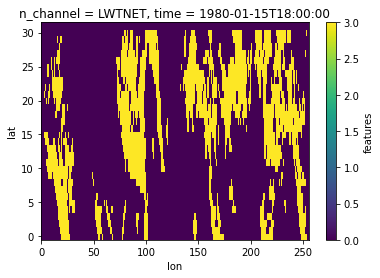

In [356]:
ds.isel(time = 59,n_channel = 2).features.plot()

In [363]:
#define function 
def show_sample(ds):
    num_channels = len(ds_sample.n_channel)
    #define figure with 1 row and 5 columns. 
    fig,axes = plt.subplots(3,3,figsize=(25, 10))
    ax = axes.flatten() # Flatten 2x2 array so that you can use ax[0],ax[1],... rather than ax[0],ax[1]...
    fig.suptitle(str(ds.time.values)[0:10]+' '+str(ds.time.values)[11:13], fontsize = 20)
    #set the background to white, for some reason its transparent
    fig.set_facecolor('w')
    #loop over features (inputs)
    for i in range(num_channels):
        #plot images
        cf = ax[i].contourf(ds.lon, ds.lat, ds.isel(n_channel = i).features,cmap=double, levels = np.arange(-4,5,1), extend = 'both')
        ax[i].axis('off')
        ax[i].set_title(ds.n_channel[i].values, fontsize = 18)
    cb = plt.colorbar(cf, ax =ax.ravel(),location='top', fraction = .05, shrink = 10,
                      ticks=[-4,-3,-2,-1, 0,1, 2,3,4],pad = .1,extendrect=True, aspect = 25, extend = 'both')


    #plot labels (output) which is AR mask
    a = ax[num_channels]
#     a.imshow(ds.labels_2d[:,:],cmap='magma')
    a.pcolormesh(ds.labels_2d.lon,ds.labels_2d.lat,
                 xr.where((ds>=1000),1,np.nan).labels_2d,
                 cmap = ListedColormap(["lightgrey"]), rasterized = True)
    # temp
    a.pcolormesh(ds.labels_2d.lon,ds.labels_2d.lat,
                 xr.where(ds.isin([1,101,1001, 1101]),1,np.nan).labels_2d, 
                 cmap = ListedColormap(["hotpink"]),rasterized = True)
    # snow
    a.pcolormesh(ds.labels_2d.lon,ds.labels_2d.lat,
                 xr.where(ds.isin([10,110,1010, 1110]),1,np.nan).labels_2d, 
                 cmap = ListedColormap(["dodgerblue"]),rasterized = True)
    # temp and snow
    a.pcolormesh(ds.labels_2d.lon,ds.labels_2d.lat,
                 xr.where(ds.isin([11,111,1011, 1111]),1,np.nan).labels_2d, 
                 cmap = ListedColormap(["rebeccapurple"]),rasterized = True)
      # AR outline
    a.contour(ds.labels_2d.lon,ds.labels_2d.lat,
               xr.where((((ds>=100) & (ds<200)) | ((ds>=1100) & (ds<1200))) ,1,0).labels_2d,
               levels = [-.5,.5], colors = 'darkslategrey', linewidths  = 4)
    rect = lambda color: plt.Rectangle((0,0),1,1, color=color)
    legend = a.legend([rect('hotpink'), 
                    rect('rebeccapurple'),
                    rect('dodgerblue')], 
                   ["Temp Anomaly","Temp and Snow Anomaly", "Snow Anomaly"], 
                   loc = 'lower center', bbox_to_anchor=(0.5, -.3),
                   ncol = 3,framealpha = 1, fontsize = 12)



    a.axis('off')
    a.set_title('Y Label', fontsize = 18)

#     fig.suptitle('class label: {}, n flashes: {}'.format(ds.label_1d_class.values,ds.label_1d_reg.values),y=0.75)

#     return ds.label_1d_AR.values

/projects/reba1583/software/anaconda/envs/research/lib/python3.7/site-packages/ipykernel_launcher.py:17: MatplotlibDeprecationWarning: The 'extend' parameter to Colorbar has no effect because it is overridden by the mappable; it is deprecated since 3.3 and will be removed two minor releases later.
/projects/reba1583/software/anaconda/envs/research/lib/python3.7/site-packages/ipykernel_launcher.py:25: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
/projects/reba1583/software/anaconda/envs/research/lib/python3.7/site-packages/ipykernel_launcher.py:29: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, o

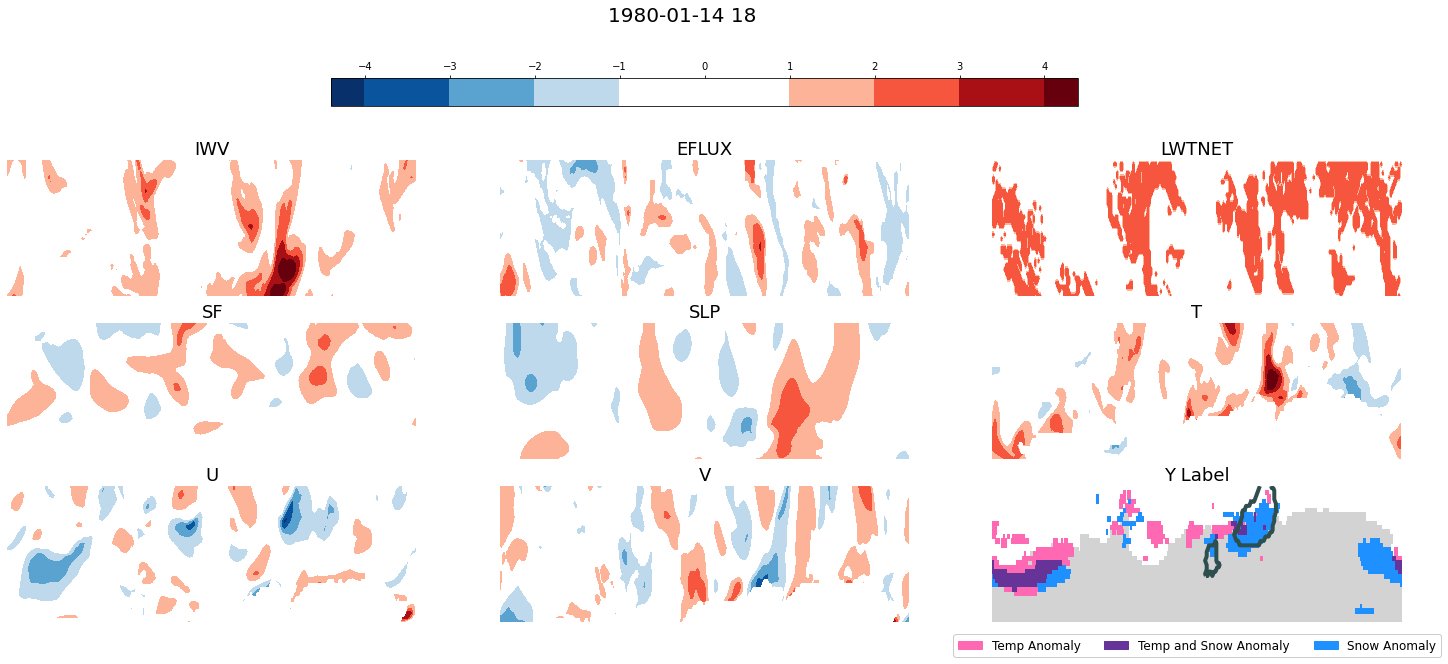

In [368]:

show_sample(ds.isel(time = 55));

In [379]:
ds.to_netcdf('/rc_scratch/reba1583/data_4day_testing')

# 5. Get normalized anomalies and Split Data into train and test

In [26]:
ds = xr.open_dataset('/pl/active/ATOC_SynopticMet/data/ar_data/Research3/ML_testing/3yr_norm_anom/data')
ds['lon'] = np.arange(-180,181,1)
ds['lat'] = np.arange(-90,1,1)

In [7]:
ds = xr.open_mfdataset('/rc_scratch/reba1583/data_4day_testing')
ds = ds.transpose('time','lon','lat','n_channel')
ds = ds.fillna(0)

In [10]:
ds.to_netcdf('/rc_scratch/reba1583/data_4day_testing.nc')

In [11]:
ds = xr.open_mfdataset('/rc_scratch/reba1583/data_4day_testing.nc')
ds

<xarray.Dataset>
Dimensions:    (time: 5848, lon: 256, lat: 32, n_channel: 8)
Coordinates:
  * n_channel  (n_channel) object 'IWV' 'EFLUX' 'LWTNET' 'SF' 'SLP' 'T' 'U' 'V'
  * time       (time) datetime64[ns] 1980-01-01 ... 1992-12-31T18:00:00
Dimensions without coordinates: lon, lat
Data variables:
    features   (time, lon, lat, n_channel) float64 dask.array<chunksize=(5848, 256, 32, 8), meta=np.ndarray>
    labels_2d  (time, lon, lat) float64 dask.array<chunksize=(5848, 256, 32), meta=np.ndarray>

In [12]:
index = np.arange(len(ds.time))
split1, split2 = int(.7*len(index)), int(.85*len(index))


In [13]:
index = np.arange(len(ds.time))
split1, split2 = int(.7*len(index)), int(.85*len(index))


np.random.shuffle(index)
index_train, index_validate, index_test = index[:split1], index[split1:split2], index[split2:]
index_train.sort()
index_validate.sort()
index_test.sort()

In [14]:
ds_train = ds.isel(time = index_train)
ds_test = ds.isel(time = index_test)
ds_validate = ds.isel(time = index_validate)

/home/reba1583/.local/lib/python3.7/site-packages/xarray/core/indexing.py:1227: PerformanceWarning: Slicing is producing a large chunk. To accept the large
chunk and silence this warning, set the option
    >>> with dask.config.set(**{'array.slicing.split_large_chunks': False}):
    ...     array[indexer]

To avoid creating the large chunks, set the option
    >>> with dask.config.set(**{'array.slicing.split_large_chunks': True}):
    ...     array[indexer]
  return self.array[key]


In [15]:
ds_train

<xarray.Dataset>
Dimensions:    (time: 4093, lon: 256, lat: 32, n_channel: 8)
Coordinates:
  * n_channel  (n_channel) object 'IWV' 'EFLUX' 'LWTNET' 'SF' 'SLP' 'T' 'U' 'V'
  * time       (time) datetime64[ns] 1980-01-01 ... 1992-12-31T12:00:00
Dimensions without coordinates: lon, lat
Data variables:
    features   (time, lon, lat, n_channel) float64 dask.array<chunksize=(4093, 256, 32, 8), meta=np.ndarray>
    labels_2d  (time, lon, lat) float64 dask.array<chunksize=(4093, 256, 32), meta=np.ndarray>

In [16]:
ds_test.to_netcdf('/rc_scratch/reba1583/test_4day.nc')

In [17]:
ds_train.to_netcdf('/rc_scratch/reba1583/train_4day.nc')

In [18]:
ds_validate.to_netcdf('/rc_scratch/reba1583/validate_4day.nc')

# 6 Select data so it is balanced between AR and No AR

* Note: ran this as a script on blanca node super computer because memory was not enough here

In [9]:
ds_train = xr.open_dataset('/pl/active/ATOC_SynopticMet/data/ar_data/Research3/ML_testing/3yr_norm_anom/ds_train').transpose('time','lon','lat','n_channel')
ds_val = xr.open_dataset('/pl/active/ATOC_SynopticMet/data/ar_data/Research3/ML_testing/3yr_norm_anom/ds_validate').transpose('time','lon','lat','n_channel')
ds_test = xr.open_dataset('/pl/active/ATOC_SynopticMet/data/ar_data/Research3/ML_testing/3yr_norm_anom/ds_test').transpose('time','lon','lat','n_channel')


In [59]:
val_num_ARs = len(ds_val.label_1d_AR.values[ds_val.label_1d_AR.values==1])
ds_val_noAR_index = ds_val.label_1d_AR.values
ds_val_noAR_index = np.squeeze(np.where(ds_val_noAR_index==0))
np.random.shuffle(ds_val_noAR_index)
ds_val_noAR_index = ds_val_noAR_index[:val_num_ARs]

ds_val_AR_index = np.squeeze(np.where(ds_val.label_1d_AR.values==1))

validate_select_times = np.sort(np.concatenate((ds_val_noAR_index,ds_val_AR_index)))

ds_val = ds_val.isel(time = validate_select_times)
ds_val.to_netcdf('/pl/active/ATOC_SynopticMet/data/ar_data/Research3/ML_testing/3yr_norm_anom/trimmed_ds_validate.nc')

In [ ]:
test_num_ARs = len(ds_test.label_1d_AR.values[ds_test.label_1d_AR.values==1])
ds_test_noAR_index = ds_test.label_1d_AR.values
ds_test_noAR_index = np.squeeze(np.where(ds_test_noAR_index==0))
np.random.shuffle(ds_test_noAR_index)
ds_test_noAR_index = ds_test_noAR_index[:test_num_ARs]

ds_test_AR_index = np.squeeze(np.where(ds_test.label_1d_AR.values==1))

test_select_times = np.sort(np.concatenate((ds_test_noAR_index,ds_test_AR_index)))

ds_test = ds_test.isel(time = test_select_times)
ds_test.to_netcdf('/pl/active/ATOC_SynopticMet/data/ar_data/Research3/ML_testing/3yr_norm_anom/trimmed_ds_test.nc')

In [61]:
train_num_ARs = len(ds_train.label_1d_AR.values[ds_train.label_1d_AR.values==1])
ds_train_noAR_index = ds_train.label_1d_AR.values
ds_train_noAR_index = np.squeeze(np.where(ds_train_noAR_index==0))
np.random.shuffle(ds_train_noAR_index)
ds_train_noAR_index = ds_train_noAR_index[:train_num_ARs]

ds_train_AR_index = np.squeeze(np.where(ds_train.label_1d_AR.values==1))

train_select_times = np.sort(np.concatenate((ds_train_noAR_index,ds_train_AR_index)))

ds_train = ds_train.isel(time = train_select_times)
ds_train.to_netcdf('/pl/active/ATOC_SynopticMet/data/ar_data/Research3/ML_testing/3yr_norm_anom/trimmed_ds_train.nc')

KeyboardInterrupt: 

# 7 Make modified 1d data for traditional ML methods

In [76]:
#2d input data for neural network algorithms
train_data = xr.open_mfdataset('/pl/active/ATOC_SynopticMet/data/ar_data/Research3/ML_testing/3yr_norm_anom/ds_train')
data = xr.open_mfdataset('/pl/active/ATOC_SynopticMet/data/ar_data/Research3/ML_testing/3yr_norm_anom/ds_validate')
test_data = xr.open_mfdataset('/pl/active/ATOC_SynopticMet/data/ar_data/Research3/ML_testing/3yr_norm_anom/ds_test')


In [96]:
# repeat for each section of data
data = train_data
name = 'train'

In [102]:
data = data.sel(lat = slice(-90,-40))
ar_binary = data.label_1d_AR.values
ar_area_count = data.label_2d_AR.sum(dim = ('lat','lon')).values

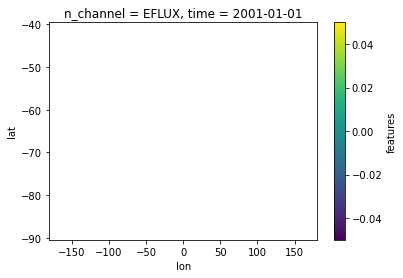

In [107]:
data.isel(n_channel = 2, time = 1020).features.plot()

In [91]:
# Make pandas dataframe with colums q_***_var where *** is the percentile (0, 10, 25, 50, 75, 90, 100) and var is the variable

q_000_data = data.min(dim = ('lat','lon')).features.values
q_010_data = data.quantile(.10, dim = ('lat','lon')).features.values
q_025_data = data.quantile(.25, dim = ('lat','lon')).features.values
q_050_data = data.quantile(.50, dim = ('lat','lon')).features.values
q_075_data = data.quantile(.75, dim = ('lat','lon')).features.values
q_090_data = data.quantile(.90, dim = ('lat','lon')).features.values
q_100_data = data.quantile(1, dim = ('lat','lon')).features.values


In [92]:
d = {'q_000_H': q_000_data[0], 'q_010_H': q_010_data[0], 'q_025_H': q_025_data[0], 'q_050_H': q_050_data[0], 
     'q_075_H': q_075_data[0], 'q_100_H': q_100_data[0], 
     'q_000_IWV': q_000_data[1], 'q_010_IWV': q_010_data[1], 'q_025_IWV': q_025_data[1], 'q_050_IWV': q_050_data[1], 
     'q_075_IWV': q_075_data[1], 'q_100_IWV': q_100_data[1], 
     'q_000_EFLUX': q_000_data[2], 'q_010_EFLUX': q_010_data[2], 'q_025_EFLUX': q_025_data[2], 'q_050_EFLUX': q_050_data[2], 
     'q_075_EFLUX': q_075_data[2], 'q_100_EFLUX': q_100_data[2], 
     'q_000_LWTNET': q_000_data[3], 'q_010_LWTNET': q_010_data[3], 'q_025_LWTNET': q_025_data[3], 'q_050_LWTNET': q_050_data[3], 
     'q_075_LWTNET': q_075_data[3], 'q_100_LWTNET': q_100_data[3], 
     'q_000_SF': q_000_data[4], 'q_010_SF': q_010_data[4], 'q_025_SF': q_025_data[4], 'q_050_SF': q_050_data[4], 
     'q_075_SF': q_075_data[4], 'q_100_SF': q_100_data[4],
     'q_000_SLP': q_000_data[5], 'q_010_SLP': q_010_data[5], 'q_025_SLP': q_025_data[5], 'q_050_SLP': q_050_data[5], 
     'q_075_SLP': q_075_data[5], 'q_100_SLP': q_100_data[5], 
     'q_000_T': q_000_data[6], 'q_010_T': q_010_data[6], 'q_025_T': q_025_data[6], 'q_050_T': q_050_data[6], 
     'q_075_T': q_075_data[6], 'q_100_T': q_100_data[6], 
     'q_000_U': q_000_data[7], 'q_010_U': q_010_data[7], 'q_025_U': q_025_data[7], 'q_050_U': q_050_data[7], 
     'q_075_U': q_075_data[7], 'q_100_U': q_100_data[7], 
     'q_000_V': q_000_data[8], 'q_010_V': q_010_data[8], 'q_025_V': q_025_data[8], 'q_050_V': q_050_data[8], 
     'q_075_V': q_075_data[8], 'q_100_V': q_100_data[8],
     'label_class': ar_binary, 'label_reg': ar_area_count
    
    }
df = pd.DataFrame(data = d)
df

,q_000_H,q_010_H,q_025_H,q_050_H,q_075_H,q_100_H,q_000_IWV,q_010_IWV,q_025_IWV,q_050_IWV,...,q_075_U,q_100_U,q_000_V,q_010_V,q_025_V,q_050_V,q_075_V,q_100_V,label_class,label_reg
0,-3.472125,-1.061429,-0.467247,0.113341,0.826926,1.814349,-1.822937,-1.292311,-0.957931,-0.198959,...,0.687296,2.083353,-4.233574,-1.361344,-0.808094,0.056208,0.769463,2.491618,0.0,0.0
1,-2.680284,-1.379377,-0.748522,-0.098454,0.752224,1.782924,-1.635354,-1.311863,-1.013518,-0.202842,...,0.466800,2.871005,-3.340605,-1.429355,-0.884696,-0.043832,0.911871,2.022429,0.0,0.0
2,-1.701944,-1.072232,-0.734945,-0.453118,0.223040,1.073671,-1.559609,-1.024908,-0.775007,-0.496233,...,0.468167,1.515763,-2.608677,-1.227348,-0.665164,0.015130,0.714294,2.776187,0.0,0.0
3,-2.197215,-0.866847,-0.643251,-0.383295,0.032129,1.139497,-1.663269,-1.150937,-0.791418,-0.457531,...,0.692394,2.305161,-2.991417,-1.211079,-0.636693,0.067049,0.553021,2.595840,0.0,0.0
4,-2.241866,-1.064651,-0.768507,-0.274984,0.141029,1.126601,-1.755197,-1.107412,-0.792271,-0.395951,...,0.543705,1.695119,-2.971090,-1.169297,-0.628967,0.085846,0.531290,2.074136,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
653,-2.191035,-1.088629,-0.574189,0.098917,0.696760,1.860200,-1.540116,-1.024727,-0.586931,-0.019920,...,0.340356,2.164198,-3.359709,-1.254874,-0.590436,0.034667,0.715962,2.025618,0.0,0.0
654,-2.378286,-1.088666,-0.683082,0.168281,0.742192,1.631531,-1.535666,-0.965579,-0.661110,0.105534,...,0.265218,2.030334,-2.958486,-1.184127,-0.638149,-0.004382,0.800812,1.868005,0.0,0.0
655,-3.026455,-1.305488,-0.437934,0.349611,0.825766,1.252272,-1.972237,-1.106501,-0.696204,0.183234,...,0.826383,2.643316,-2.526538,-1.216464,-0.639049,-0.023687,0.751158,2.161564,0.0,0.0
656,-1.430070,-0.651956,-0.101962,0.386693,0.955861,1.691426,-1.373419,-1.033273,-0.817062,-0.450938,...,0.564381,1.873121,-4.558866,-1.158884,-0.525754,0.074844,0.624612,3.925467,0.0,0.0


In [93]:
df.to_csv('/pl/active/ATOC_SynopticMet/data/ar_data/Research3/ML_testing/3yr_norm_anom/tradML_ds_'+name)